In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram #Used in Frequency Feature

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

from sklearn.datasets import make_classification


In [3]:
def plot2(eegchannel, leneeg,sfreq, starttime, endtime):
    # eegchannel is the channel of EEG you wish to plot, for example F4-C4
    # leneeg is then length of the eeg file
    # sfreq is the sampling frequency
    # eegtime is the numpy array created that converts the EEG index to seconds, based on the sampling frequency
    # starttime is time in seconds of the start time of the EEG data that you wish to plot
    # endtime is the time in seconds of the end time of the EEG data that you wish to plot 
    eegst=int(sfreq*starttime) # calculate the start eeg index
    eeget=int(sfreq*endtime)# calculate the end eeg index
    eegtime= np.arange(0,leneeg,1)/sfreq 
    fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,5))
    eeg_trace = ax.plot(eegtime[eegst:eeget+1], eeg.loc[eegst:eeget,eegchannel],color='blue',label='EEG') # Plot EEG Data
    ax.set_ylabel('$\mu V$',color='blue',fontsize=16) # Set left hand yaxis label to 'Cases'.
    ax.set_xlabel('Seconds',color='green',fontsize=16) # Set left hand yaxis label to 'Cases'.
    ax2 = ax.twinx() # Create a second y axis on the right hand side of the plot using the same x axis.
    annotations = ax2.plot(channelAnno.loc[starttime:endtime,eegchannel],color='red',label='Seizure') # Plot Annotation data.
    ax2.set_ylabel('Seizure',color='red',fontsize=16) # Set right hand yaxis label to 'Deaths'.
    ax2.set_ylim(bottom=0) # Limit the right-hand y axis to start at 0.
    ax2.grid() # Plot a grid for the right hand y axis.
    ax2.legend(eeg_trace + annotations, [eegchannel,'Seizure'], fontsize=16, loc='best')
    ax.set_title('EEG and Anotation',fontsize=16) 
    plt.show

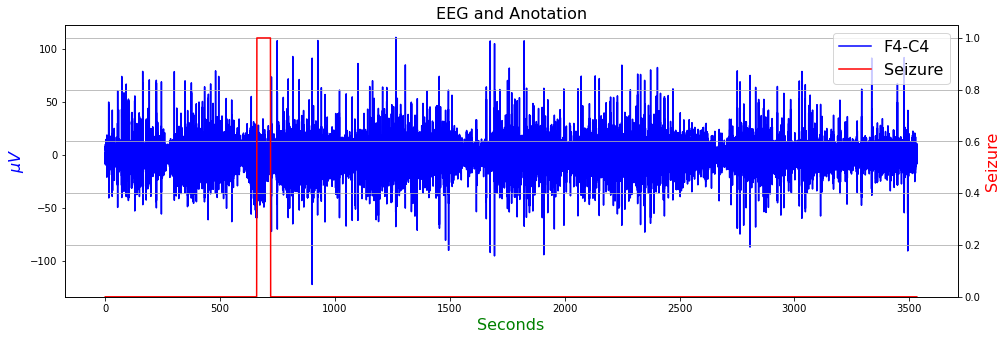

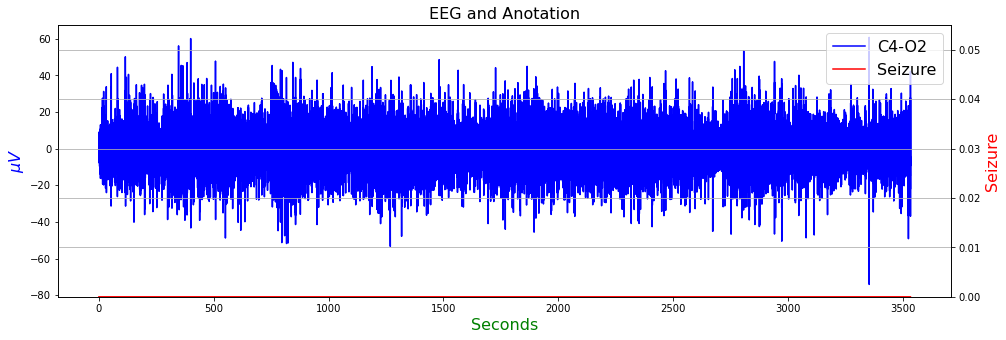

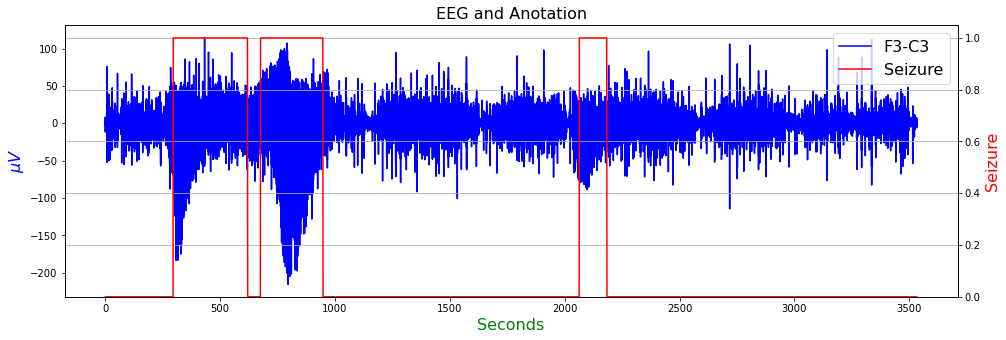

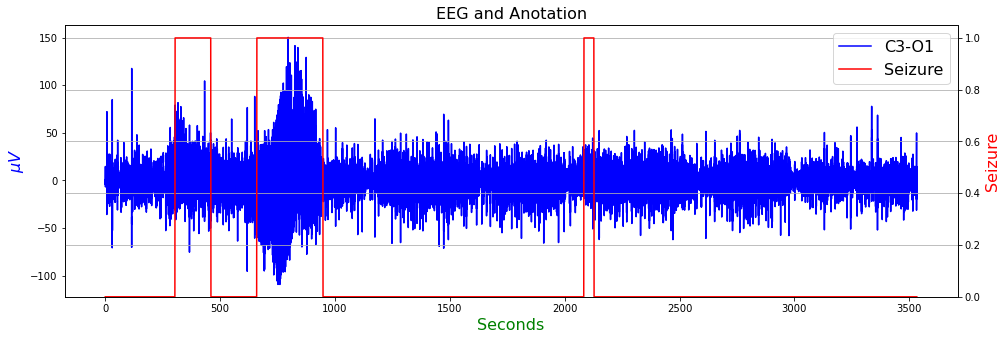

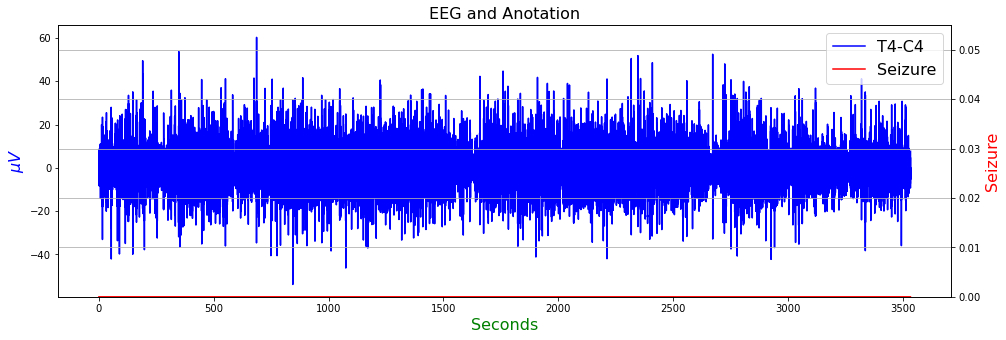

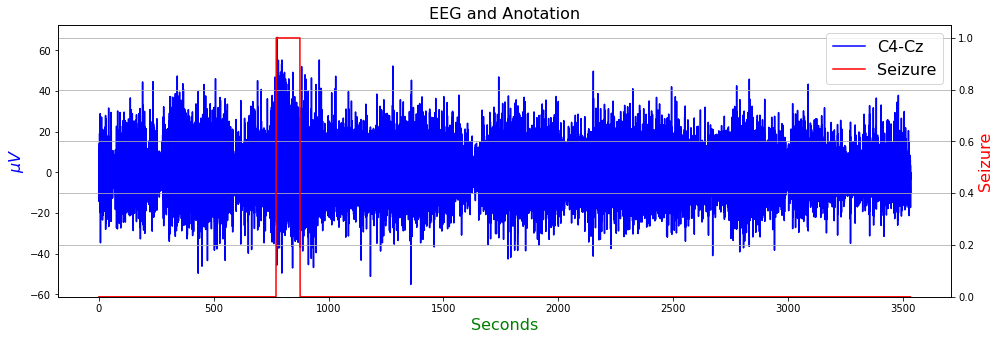

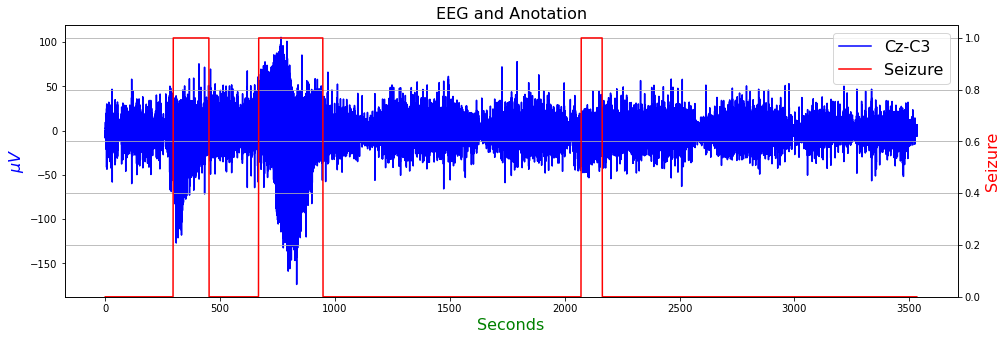

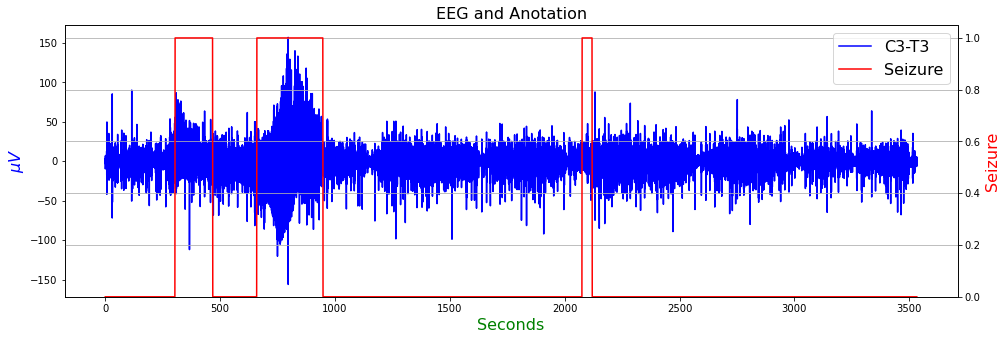

In [4]:
eeg =  pd.read_csv('EEG9_processed.csv')
channelAnno = pd.read_csv('eeg9_Combined_Exper_Annotations.csv')
plot2('F4-C4', len(eeg),32, 0, len(eeg)/32)
plot2('C4-O2', len(eeg),32, 0, len(eeg)/32)
plot2('F3-C3', len(eeg),32, 0, len(eeg)/32)
plot2('C3-O1', len(eeg),32, 0, len(eeg)/32)
plot2('T4-C4', len(eeg),32, 0, len(eeg)/32)
plot2('C4-Cz', len(eeg),32, 0, len(eeg)/32)
plot2('Cz-C3', len(eeg),32, 0, len(eeg)/32)
plot2('C3-T3', len(eeg),32, 0, len(eeg)/32)

In [5]:
eeg.loc[:,"C4-Cz"].to_numpy()

array([ 1.65090683,  2.2772788 ,  1.78185642, ..., -1.46489552,
       -2.87639974, -0.27418893])

In [6]:
channelAnno

,Unnamed: 0,F4-C4,C4-O2,F3-C3,C3-O1,T4-C4,C4-Cz,Cz-C3,C3-T3
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3543,3543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3544,3544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3545,3545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3546,3546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
eeg

,F4-C4,C4-O2,F3-C3,C3-O1,T4-C4,C4-Cz,Cz-C3,C3-T3
0,1.887922,-1.620295,1.047026,-4.060826,1.101734,1.650907,-0.302366,-1.380142
1,0.985949,-5.521338,-4.923230,-2.474043,5.250998,2.277279,-5.451613,-1.861027
2,1.011332,-5.883657,-5.042618,-2.175349,5.463895,1.781856,-5.766853,-1.507051
3,1.107370,-4.592668,-3.667937,-2.996473,4.663299,3.042621,-4.689177,-2.069705
4,1.425294,-6.300701,-5.902869,-1.474293,5.487804,0.827836,-5.835573,-1.848130
...,...,...,...,...,...,...,...,...
113067,10.769510,16.479184,0.106986,6.202392,-0.252663,-14.086621,0.512820,2.424597
113068,4.908637,-15.637027,-0.092107,7.124224,-4.658679,-1.995848,-1.753141,4.317196
113069,2.878931,-17.005395,0.101585,1.407520,-1.953992,-1.464896,-0.844548,2.882014
113070,4.649306,-9.398800,1.795556,-4.234313,3.009348,-2.876400,-4.340586,-0.780029


# Line Length

In [8]:
def LLcalculation(N, epoch):
    LL = sum(np.absolute(epoch[i+1]-epoch[i]) for i in range(N-1))
    return LL

In [9]:
NEpoch = 256
Noverlap=128
numberofEpochs = (len(eeg)-NEpoch)//(NEpoch-Noverlap) + 1 # Use integer divison // to get exact number of epochs
numberofEpochs

882

In [10]:
epochstart=0
LL_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg.loc[epochstart:epochstart+NEpoch-1,'C3-O1'].to_numpy()
    epochstart += Noverlap
    LL_Feature=np.append(LL_Feature,LLcalculation(NEpoch, Epoch))

In [11]:
(LL_Feature)

array([ 952.71417732, 1122.48460411,  776.53788581, 1082.52206044,
        983.01012608,  627.57859376, 1108.57194656, 1086.9760449 ,
        451.36504769,  679.69850841,  713.23971043,  355.91374783,
        779.3477038 ,  974.90983901,  523.45917532,  325.10416293,
        748.48897141,  831.36508742,  642.73727978,  988.57704095,
        763.16598223,  908.02866554, 1110.94210863,  786.9014544 ,
        979.86524053, 1021.80903281,  793.2435065 , 1111.95127209,
       1471.31590607, 1219.1547794 , 1190.73089738, 1286.53801464,
       1032.55361057, 1100.99495276, 1126.91834738, 1214.60468595,
       1143.48508132,  904.00766075,  914.12254985, 1137.28921992,
        920.12880682,  403.74708019,  881.32986796, 1385.23578326,
       1281.5686892 , 1129.86391605, 1228.2934524 , 1127.33311253,
        934.93166433,  978.82802736,  706.85468104,  442.67216951,
        427.41206452,  718.07850474, 1366.85810121, 1442.43710266,
       1087.65738341,  987.92543662,  951.83132817, 1058.69177

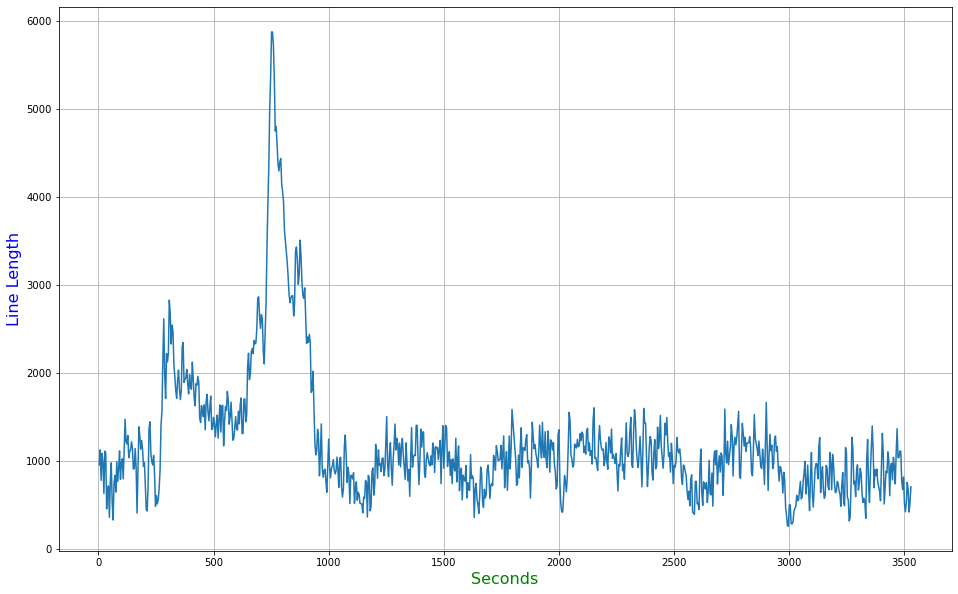

In [12]:
featuretime= np.arange(1,numberofEpochs+1,1)*4 # Converting the Feature index to seconds, ie. a new feature value is generated every 4 seconds.
plt.figure(figsize=(16,10))
plt.plot(featuretime, LL_Feature)
plt.ylabel('Line Length', fontsize=16, color='blue')
plt.xlabel('Seconds',color='green',fontsize=16)
plt.grid()
plt.show()

In [13]:
baby9_C4CZ = channelAnno.loc[:,"C4-Cz"][featuretime].to_numpy()

In [14]:
baby9_C4CZ

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
(LL_Feature.reshape(-1,1))

array([[ 952.71417732],
       [1122.48460411],
       [ 776.53788581],
       [1082.52206044],
       [ 983.01012608],
       [ 627.57859376],
       [1108.57194656],
       [1086.9760449 ],
       [ 451.36504769],
       [ 679.69850841],
       [ 713.23971043],
       [ 355.91374783],
       [ 779.3477038 ],
       [ 974.90983901],
       [ 523.45917532],
       [ 325.10416293],
       [ 748.48897141],
       [ 831.36508742],
       [ 642.73727978],
       [ 988.57704095],
       [ 763.16598223],
       [ 908.02866554],
       [1110.94210863],
       [ 786.9014544 ],
       [ 979.86524053],
       [1021.80903281],
       [ 793.2435065 ],
       [1111.95127209],
       [1471.31590607],
       [1219.1547794 ],
       [1190.73089738],
       [1286.53801464],
       [1032.55361057],
       [1100.99495276],
       [1126.91834738],
       [1214.60468595],
       [1143.48508132],
       [ 904.00766075],
       [ 914.12254985],
       [1137.28921992],
       [ 920.12880682],
       [ 403.747

In [16]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(LL_Feature.reshape(-1,1), baby9_C4CZ.astype(str));

In [17]:
pred = rf.predict(LL_Feature.reshape(-1,1))

In [18]:
pred

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.015, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.05 , 0.086, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [19]:
errors = abs(pred - baby9_C4CZ)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.01 degrees.


In [20]:
rf.score(LL_Feature.reshape(-1,1), baby9_C4CZ)

0.9030471724478792

In [21]:
class_preds = (pred > 0.5).astype(int)


In [27]:
confusion_matrix(baby9_C4CZ, class_preds )


array([[856,   0],
       [  0,  26]], dtype=int64)

In [24]:
from sklearn.svm import SVC

# Define the SVM model with the chosen hyperparameters
svm_model = SVC(kernel='linear', C=1, probability=True)

# Fit the model on the resampled training data
svm_model.fit(LL_Feature.reshape(-1,1), baby9_C4CZ)

# Predict on the test set
svm_pred = svm_model.predict(LL_Feature.reshape(-1,1))

In [25]:
svm_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0.